# importing the required libraries

In [1]:
import numpy as np

In [4]:
import tensorflow as tf

In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils

# loading the data

In [6]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 102s 9us/step


In [7]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Analyzing the data

In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
y_train[0]

5

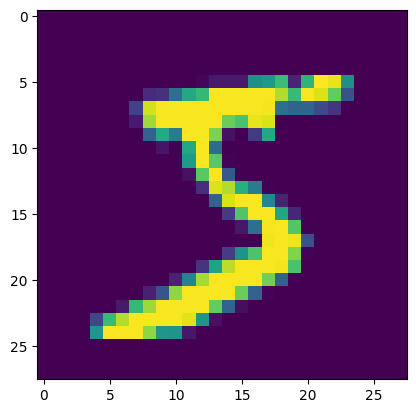

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [10]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [12]:
y_train[2]

4

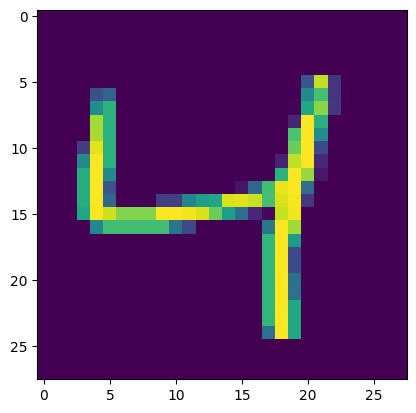

In [13]:
plt.imshow(x_train[2])

# Reshaping the data

In [ ]:
# x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

# Applying one hot encoding

In [15]:
number_of_classes=10
y_train=np_utils.to_categorical(y_train,number_of_classes)
y_test=np_utils.to_categorical(y_test,number_of_classes)

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# sprint 2
model building

Add CNN layer


In [19]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape =(28,28,1), activation='relu'))
model.add(Conv2D(32,(3,3),activation ='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes, activation = 'softmax'))

# Compiler the model

In [20]:
model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])


# Train the model

In [21]:
model.fit(x_train,y_train, validation_data = (x_test,y_test),epochs =2,batch_size = 32)

2022-11-05 19:23:13.474511: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/2
1875/1875 [==============================] - 521s 277ms/step - loss: 0.2563 - accuracy: 0.9479 - val_loss: 0.0912 - val_accuracy: 0.9710
Epoch 2/2
1875/1875 [==============================] - 505s 270ms/step - loss: 0.0773 - accuracy: 0.9768 - val_loss: 0.0855 - val_accuracy: 0.9736


# Observing the metrics 

In [22]:
metrics = model.evaluate(x_test,y_test,verbose = 0)
print("metrics (test loss & test Accuaracy): ")
print(metrics)

metrics (test loss & test Accuaracy): 
[0.08551321178674698, 0.9735999703407288]


# Test the model

In [23]:
prediction = model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 386ms/step
[[8.86143354e-08 5.68138462e-12 2.34622828e-08 5.75276182e-09
  7.59829645e-13 5.36446026e-11 9.34883478e-15 9.99999404e-01
  1.10837760e-07 4.11195288e-07]
 [6.81530173e-06 8.23943594e-07 9.99974370e-01 1.05177200e-09
  1.35546130e-10 3.00530290e-09 1.80330153e-05 1.00319735e-11
  4.23824744e-08 2.39274212e-10]
 [3.07930108e-08 9.99893665e-01 1.40506756e-06 7.21081372e-09
  3.26116970e-05 1.69225711e-06 9.06975572e-07 1.32760879e-05
  5.64462716e-05 2.64802913e-09]
 [9.99735892e-01 2.06207607e-09 3.03116821e-07 1.68945935e-09
  5.70605714e-08 3.61144686e-07 4.43714707e-05 8.74951297e-07
  6.61316744e-06 2.11551640e-04]]


In [34]:
print(np.argmax(prediction,axis= 1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Observing the metrics

In [24]:
metrics = model.evaluate(x_test,y_test,verbose = 0)
print("metrics (test loss & test Accuaracy): ")
print(metrics)

metrics (test loss & test Accuaracy): 
[0.08551321178674698, 0.9735999703407288]


# saving the model

In [25]:
model.save('model/mnistCNN.h5')

# Test with saved model 

1/1 [==============================] - 0s 301ms/step
[3]
1/1 [==============================] - 0s 78ms/step
[8]
1/1 [==============================] - 0s 57ms/step
[2]
1/1 [==============================] - 0s 62ms/step
[4]
1/1 [==============================] - 0s 74ms/step
[4]
1/1 [==============================] - 0s 60ms/step
[7]


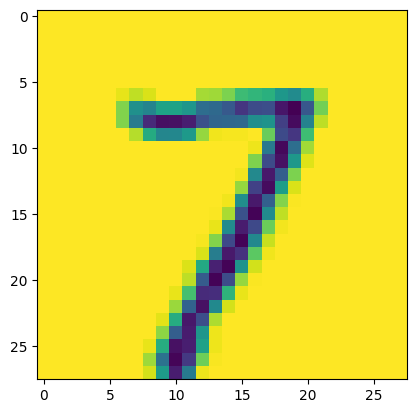

In [43]:
from tensorflow.keras.models import load_model
from PIL import Image
model = load_model('./model/mnistCNN.h5')

for index in range(6):
    img = Image.open('data/' + str(index) + '.png').convert("L")
    img = img.resize((28,28))
    im2arr = np.array(img)
    im2arr = im2arr.reshape(1,28,28,1)
    
    y_pred = model.predict(im2arr)
   
    print(np.argmax(y_pred,axis= 1))
    